In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime
from scipy import stats
import seaborn as sns

In [2]:
cd /home/tommy/Desktop/EAP project

/home/tommy/Desktop/EAP project


In [30]:
raw = pd.read_excel('ppi_fwds.xlsx')

In [31]:
raw.tail(5)

,Dates,FX,PPIratio,Group,3m points,6m points,9m points
3865,2018-06-29,0.6768,1.059759,NZDUSD,0.60,4.80,19.92
3866,2018-07-31,0.6818,1.059263,NZDUSD,0.65,5.91,22.30
3867,2018-08-31,0.6622,1.061446,NZDUSD,1.50,6.90,27.10
3868,2018-09-28,0.6619,1.098243,NZDUSD,3.63,10.00,33.00
3869,2018-10-31,0.6517,1.091103,NZDUSD,7.00,16.65,43.22


In [32]:
raw.columns = ['Dates','FX','PPI','Pair','3m','6m','12m']
pairs = raw.Pair.unique()

In [33]:
pair = []
for elem in pairs:
    pair.append(raw.loc[raw.Pair == elem,:])

In [39]:
pair = []
for elem in pairs:
    df= raw.loc[raw.Pair == elem,:]
    df.reset_index()
    df['PPP']= df.FX.shift(1)*(df.PPI/df.PPI.shift(1))#calculating PPP
    df1 = df[1:].reset_index().fillna(value=0).iloc[:,1:]
    pair.append(df1)

/home/tommy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [49]:
###without adding new shit
pair = []
for elem in pairs:
    df= raw.loc[raw.Pair == elem,:]
    df.reset_index()
    pair.append(df)


In [68]:
for elem in pair:
    try:
        X = sm.add_constant(elem.PPI)
        model = sm.OLS(elem.FX,X).fit()
    
    except:
        pass

In [109]:
elem = pair[0]
elem = elem.fillna(value=0)
X = sm.add_constant(elem.PPI)
model = sm.OLS(elem.FX,X).fit()
fitted = model.params[0] + model.params[1]*elem.PPI#fitted value
FX_greater = 1*(elem.FX > fitted)#fx > fitted?

In [123]:
val = 0
months = []
for i in FX_greater: #computes number of consecutive months FX > fitted
    val = i + val * i
    months.append(val)
months = pd.Series(months)
##hedging strategy function:
#input: dataframe, #months FX>fitted, 
#output: effective FX
#def hedge(df,3):
    #pass

In [135]:
hedge = 1*(months > 3)
FX_eff = []

for (fx,h) in zip(elem.FX,hedge):
    if h == 0:
        p = fx
    else:
        pass
    FX_eff.append(p)
    
fxe = pd.Series(FX_eff)

Text(0,0.5,'FX rate')

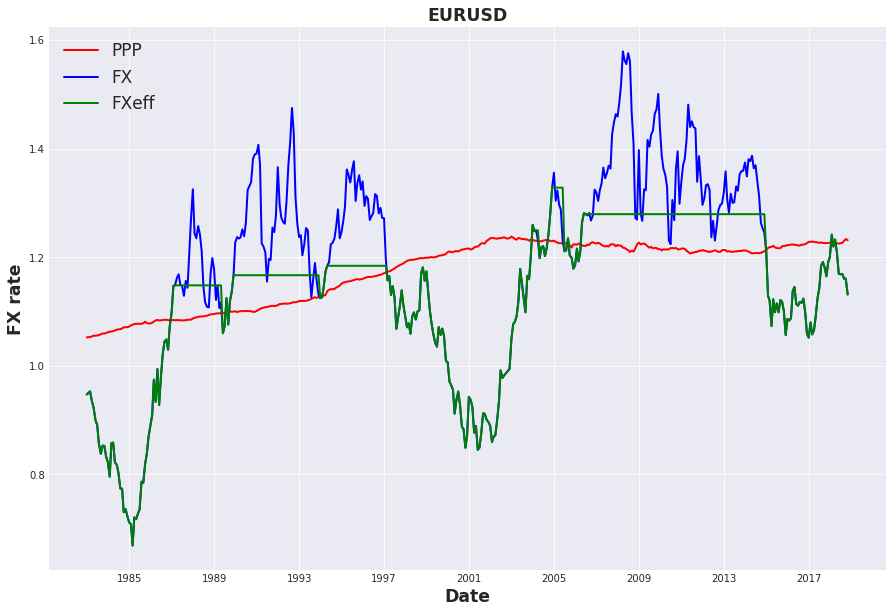

In [138]:
#plot
sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,10))
ax=fig.add_subplot(1,1,1)
#ax.plot(elem.Dates,FX_greater,c='green',linewidth = 2,label='FX>PPP')
ax.plot(elem.Dates,fitted,c='red',linewidth = 2,label='PPP')
ax.plot(elem.Dates,elem.FX,c='blue',linewidth = 2,label='FX')
ax.plot(elem.Dates,fxe,c='green',linewidth = 2,label='FXeff')
ax.legend(loc='upper left',prop={'size': 17})
ax.set_title('EURUSD',fontsize ='xx-large', fontweight ='bold')
ax.set_xlabel('Date',fontsize ='xx-large', fontweight ='bold')
ax.set_ylabel('FX rate', rotation = 90, fontsize ='xx-large',fontweight='bold')